In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("soc-sign-bitcoinotc.csv", header=None, names=["source", "target", "rating", "timestamp"])


# Preview
print(df.head())
print(df.info())


   source  target  rating     timestamp
0       6       2       4  1.289242e+09
1       6       5       2  1.289242e+09
2       1      15       1  1.289243e+09
3       4       3       7  1.289245e+09
4      13      16       8  1.289254e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35592 entries, 0 to 35591
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     35592 non-null  int64  
 1   target     35592 non-null  int64  
 2   rating     35592 non-null  int64  
 3   timestamp  35592 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.1 MB
None


In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("soc-sign-bitcoinotc.csv", header=None, names=["source", "target", "rating", "timestamp"])

# Convert timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Sort by sender and time
df = df.sort_values(by=["source", "datetime"])

# Time since last transaction per sender
df["prev_txn_time"] = df.groupby("source")["datetime"].shift(1)
df["time_diff_sec"] = (df["datetime"] - df["prev_txn_time"]).dt.total_seconds()

# Count of transactions per sender/receiver
df["sender_txn_count"] = df.groupby("source").cumcount() + 1
df["receiver_txn_count"] = df.groupby("target").cumcount() + 1

# Rolling average trust score
df["sender_avg_rating"] = df.groupby("source")["rating"].expanding().mean().reset_index(level=0, drop=True)
df["receiver_avg_rating"] = df.groupby("target")["rating"].expanding().mean().reset_index(level=0, drop=True)

# Unique receivers (social diversity)
df["unique_receivers"] = df.groupby("source")["target"].apply(
    lambda x: x.expanding().apply(lambda s: len(set(s)), raw=False)
).reset_index(level=0, drop=True)

# Fill NA values
df.fillna(0, inplace=True)

# Save processed dataset
df.to_csv("processed_bitcoinotc.csv", index=False)


C:\Users\Kunal Vishwa\AppData\Local\Temp\ipykernel_18188\2866900466.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


C:\Users\Kunal Vishwa\AppData\Local\Temp\ipykernel_18188\2438391869.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["prev_txn_time"] = pd.to_datetime(df["prev_txn_time"], errors='coerce')


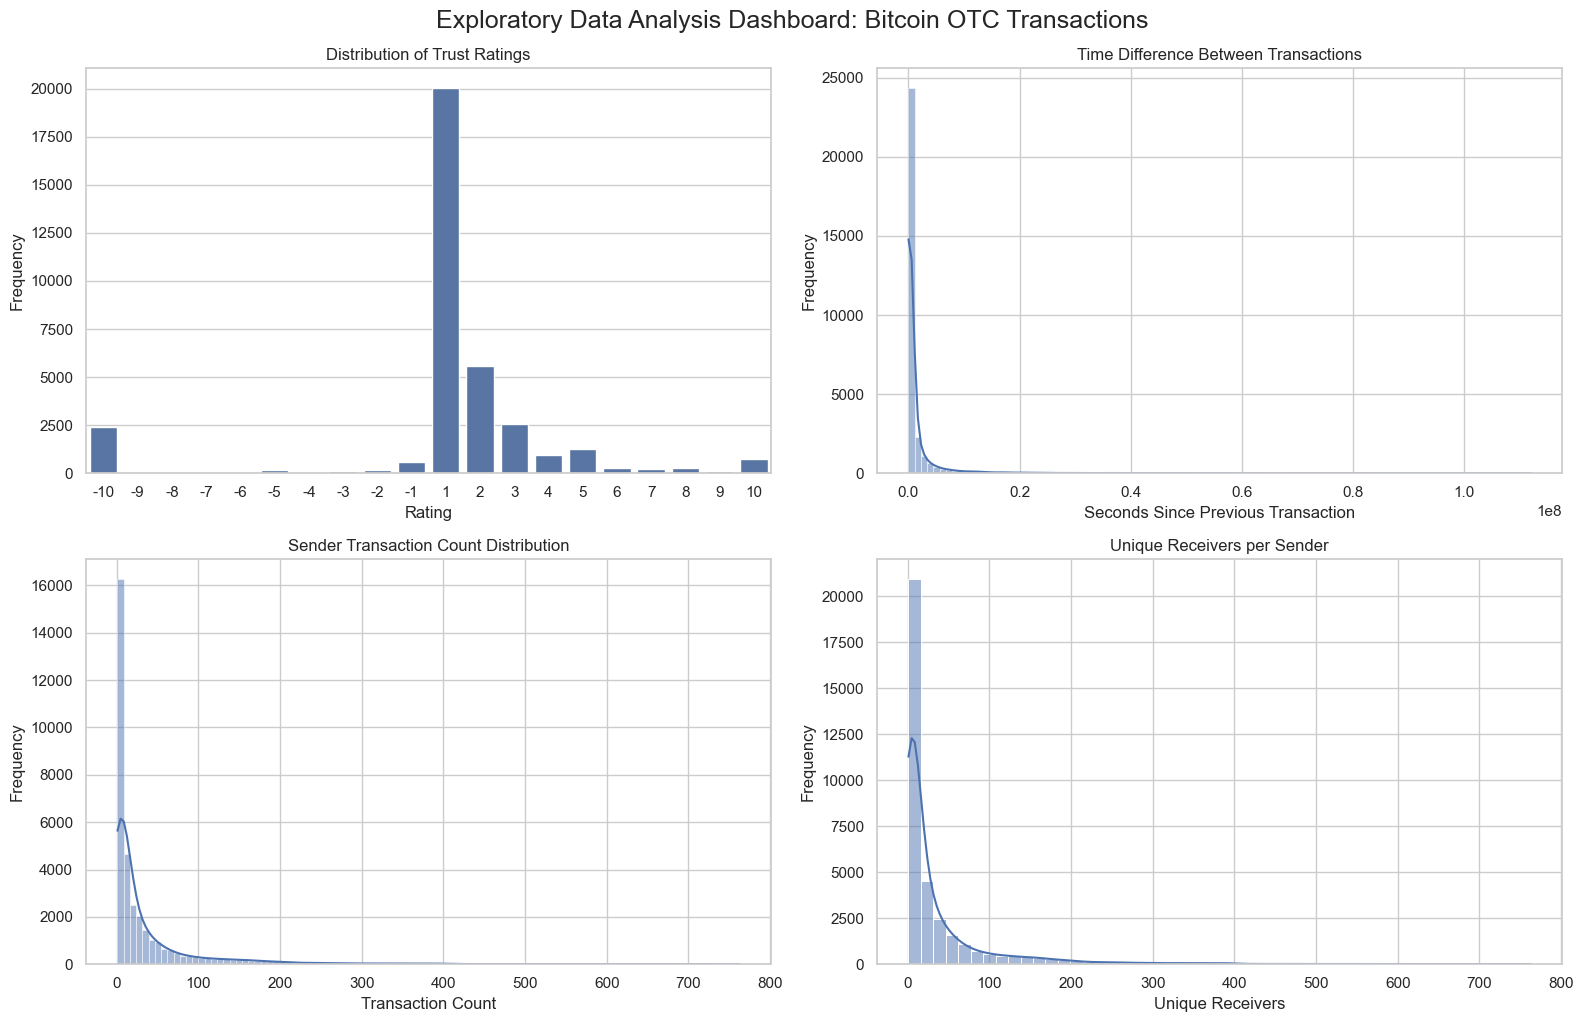

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed dataset
df = pd.read_csv("processed_bitcoinotc.csv")

# Fix datetime columns
df["datetime"] = pd.to_datetime(df["datetime"], errors='coerce')
df["prev_txn_time"] = pd.to_datetime(df["prev_txn_time"], errors='coerce')

# Clean 'time_diff_sec' for valid values only
df_cleaned = df[
    df['time_diff_sec'].notna() &
    np.isfinite(df['time_diff_sec']) &
    (df['time_diff_sec'] > 0)
]

# Set seaborn style
sns.set(style="whitegrid")

# Create dashboard
fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 rows, 2 columns

# 1. Trust Rating Distribution
sns.countplot(data=df, x="rating", ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Trust Ratings")
axs[0, 0].set_xlabel("Rating")
axs[0, 0].set_ylabel("Frequency")

# 2. Time Difference Between Transactions
sns.histplot(df_cleaned["time_diff_sec"], bins=100, kde=True, ax=axs[0, 1])
axs[0, 1].set_title("Time Difference Between Transactions")
axs[0, 1].set_xlabel("Seconds Since Previous Transaction")
axs[0, 1].set_ylabel("Frequency")

# 3. Sender Transaction Count
sns.histplot(df["sender_txn_count"], bins=100, kde=True, ax=axs[1, 0])
axs[1, 0].set_title("Sender Transaction Count Distribution")
axs[1, 0].set_xlabel("Transaction Count")
axs[1, 0].set_ylabel("Frequency")

# 4. Unique Receivers per Sender
sns.histplot(df["unique_receivers"], bins=50, kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Unique Receivers per Sender")
axs[1, 1].set_xlabel("Unique Receivers")
axs[1, 1].set_ylabel("Frequency")

# Tight layout for better spacing
plt.tight_layout()
plt.suptitle("Exploratory Data Analysis Dashboard: Bitcoin OTC Transactions", fontsize=18, y=1.02)
plt.show()


C:\Users\Kunal Vishwa\AppData\Local\Temp\ipykernel_18188\1739187114.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["prev_txn_time"] = pd.to_datetime(df["prev_txn_time"], errors='coerce')


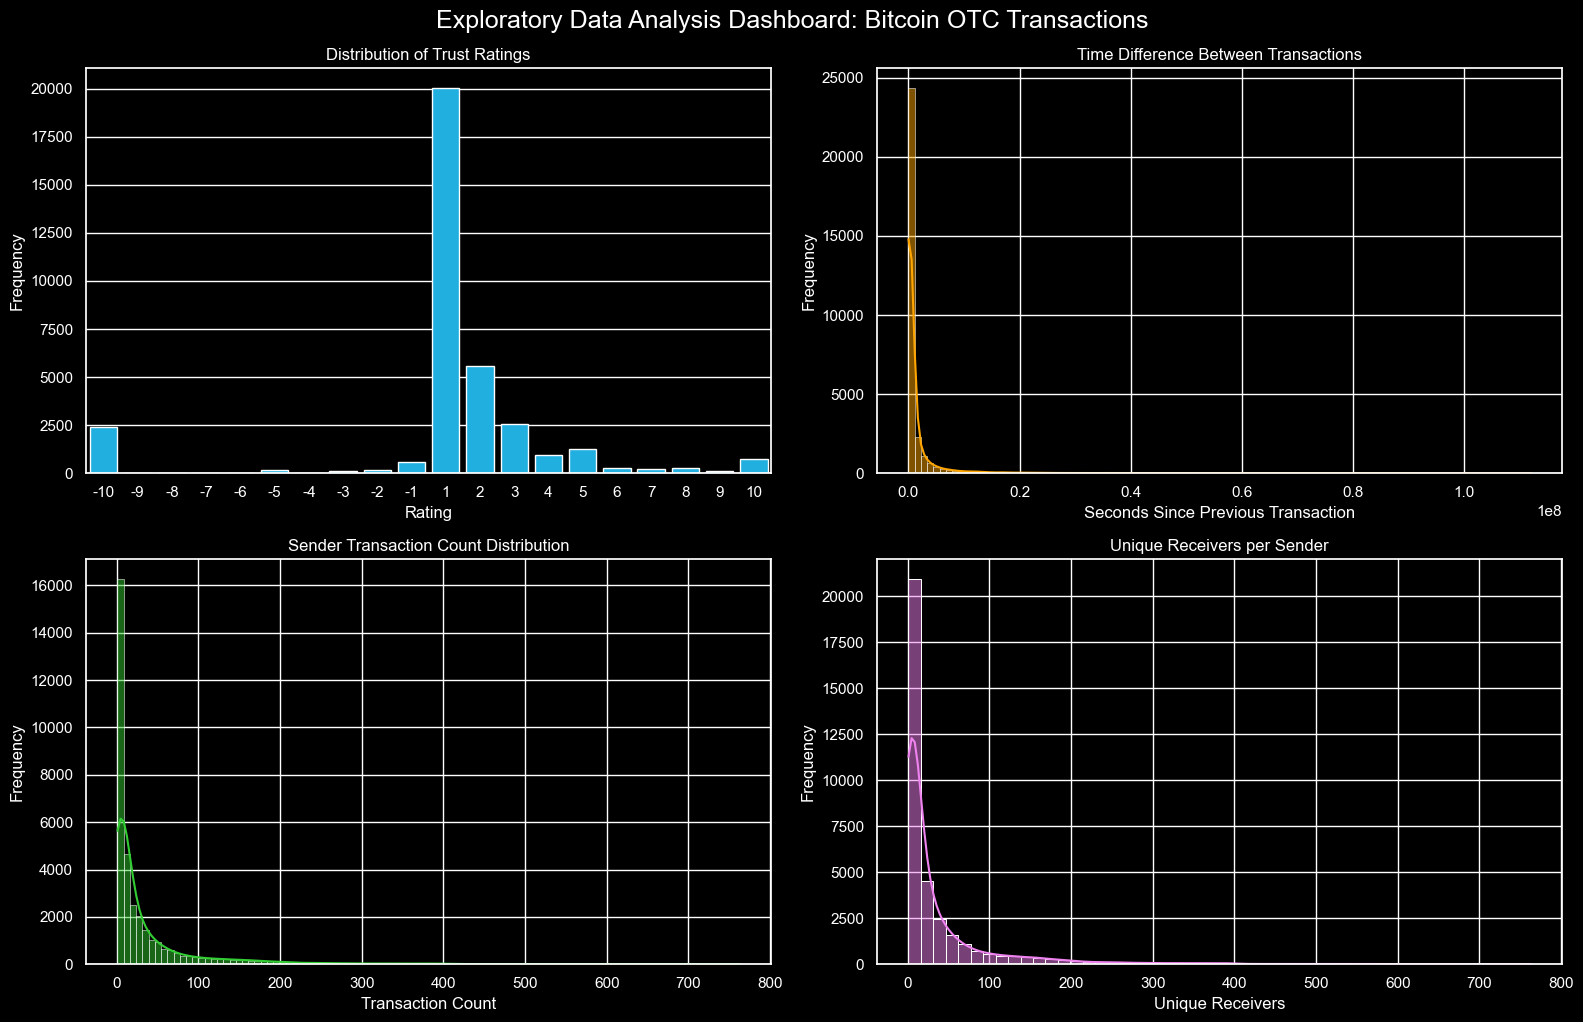

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the processed dataset
df = pd.read_csv("processed_bitcoinotc.csv")

# Fix datetime columns
df["datetime"] = pd.to_datetime(df["datetime"], errors='coerce')
df["prev_txn_time"] = pd.to_datetime(df["prev_txn_time"], errors='coerce')

# Clean 'time_diff_sec'
df_cleaned = df[
    df['time_diff_sec'].notna() &
    np.isfinite(df['time_diff_sec']) &
    (df['time_diff_sec'] > 0)
]

# Set dark background style
sns.set_style("darkgrid")
plt.style.use("dark_background")

# Create dashboard
fig, axs = plt.subplots(2, 2, figsize=(16, 10), facecolor='black')

# Color scheme for readability
title_color = 'white'
label_color = 'white'

# 1. Trust Rating Distribution
sns.countplot(data=df, x="rating", ax=axs[0, 0], color='deepskyblue')
axs[0, 0].set_title("Distribution of Trust Ratings", color=title_color)
axs[0, 0].set_xlabel("Rating", color=label_color)
axs[0, 0].set_ylabel("Frequency", color=label_color)
axs[0, 0].tick_params(colors=label_color)

# 2. Time Difference Between Transactions
sns.histplot(df_cleaned["time_diff_sec"], bins=100, kde=True, ax=axs[0, 1], color='orange')
axs[0, 1].set_title("Time Difference Between Transactions", color=title_color)
axs[0, 1].set_xlabel("Seconds Since Previous Transaction", color=label_color)
axs[0, 1].set_ylabel("Frequency", color=label_color)
axs[0, 1].tick_params(colors=label_color)

# 3. Sender Transaction Count
sns.histplot(df["sender_txn_count"], bins=100, kde=True, ax=axs[1, 0], color='limegreen')
axs[1, 0].set_title("Sender Transaction Count Distribution", color=title_color)
axs[1, 0].set_xlabel("Transaction Count", color=label_color)
axs[1, 0].set_ylabel("Frequency", color=label_color)
axs[1, 0].tick_params(colors=label_color)

# 4. Unique Receivers per Sender
sns.histplot(df["unique_receivers"], bins=50, kde=True, ax=axs[1, 1], color='violet')
axs[1, 1].set_title("Unique Receivers per Sender", color=title_color)
axs[1, 1].set_xlabel("Unique Receivers", color=label_color)
axs[1, 1].set_ylabel("Frequency", color=label_color)
axs[1, 1].tick_params(colors=label_color)

# Final layout
plt.tight_layout()
plt.suptitle("Exploratory Data Analysis Dashboard: Bitcoin OTC Transactions", fontsize=18, color='white', y=1.02)
plt.savefig("eda_dashboard_dark.png", dpi=300, facecolor='black')
plt.show()


Anomaly Counts (Isolation Forest):
is_anomaly
0    34880
1      712
Name: count, dtype: int64


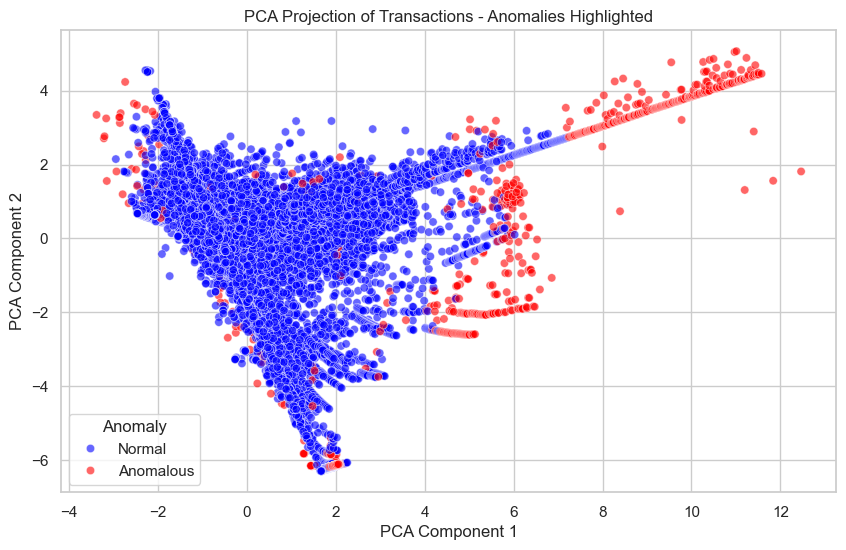

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# Select modeling features
features = [
    'time_diff_sec',
    'sender_txn_count',
    'receiver_txn_count',
    'sender_avg_rating',
    'receiver_avg_rating',
    'unique_receivers'
]

# Clean + scale
df_model = df[features].replace([np.inf, -np.inf], np.nan).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
df_model['anomaly_score'] = iso_forest.fit_predict(X_scaled)
df_model['is_anomaly'] = df_model['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_model['pca_1'] = X_pca[:, 0]
df_model['pca_2'] = X_pca[:, 1]

# Print anomaly summary
print("Anomaly Counts (Isolation Forest):")
print(df_model['is_anomaly'].value_counts())

# Save labeled dataset
df_model.to_csv("bitcoinotc_with_isolationforest.csv", index=False)

# Save PCA anomaly plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_model,
    x='pca_1',
    y='pca_2',
    hue='is_anomaly',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Normal", "Anomalous"], title="Anomaly")
plt.title("PCA Projection of Transactions - Anomalies Highlighted")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_anomaly_plot_isolationforest.png", dpi=300)
plt.show()


Anomaly Counts (One-Class SVM):
is_anomaly_svm
0    34879
1      713
Name: count, dtype: int64


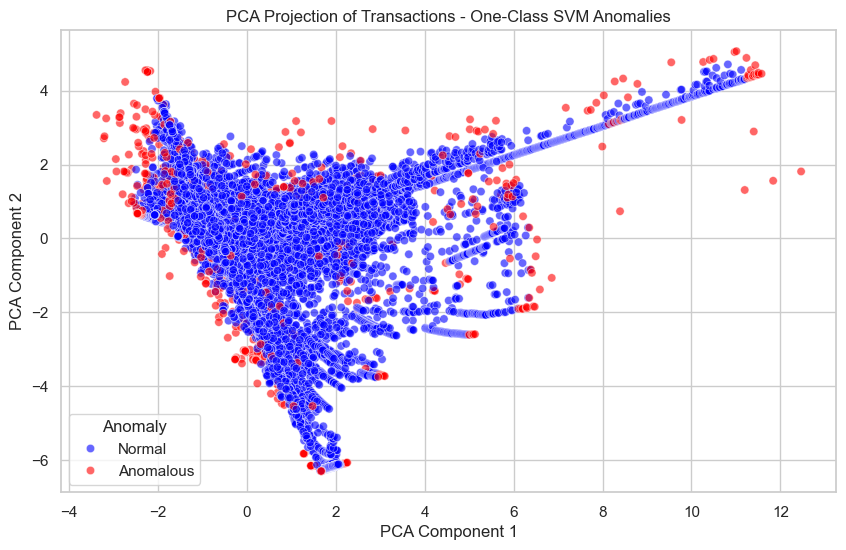

In [6]:
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Use the same features and scaled data from Isolation Forest step
features = [
    'time_diff_sec',
    'sender_txn_count',
    'receiver_txn_count',
    'sender_avg_rating',
    'receiver_avg_rating',
    'unique_receivers'
]

# Re-scale the data
df_model = df[features].replace([np.inf, -np.inf], np.nan).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Train One-Class SVM
oc_svm = OneClassSVM(kernel="rbf", nu=0.02, gamma='auto')
df_model['svm_score'] = oc_svm.fit_predict(X_scaled)
df_model['is_anomaly_svm'] = df_model['svm_score'].apply(lambda x: 1 if x == -1 else 0)

# PCA for SVM visualization
pca_svm = PCA(n_components=2)
X_pca_svm = pca_svm.fit_transform(X_scaled)
df_model['pca1_svm'] = X_pca_svm[:, 0]
df_model['pca2_svm'] = X_pca_svm[:, 1]

# Save SVM labeled data
df_model.to_csv("bitcoinotc_with_svm.csv", index=False)

# Print anomaly count summary
print("Anomaly Counts (One-Class SVM):")
print(df_model['is_anomaly_svm'].value_counts())

# Plot SVM anomaly PCA
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_model,
    x='pca1_svm',
    y='pca2_svm',
    hue='is_anomaly_svm',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Normal", "Anomalous"], title="Anomaly")
plt.title("PCA Projection of Transactions - One-Class SVM Anomalies")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_anomaly_plot_svm.png", dpi=300)
plt.show()


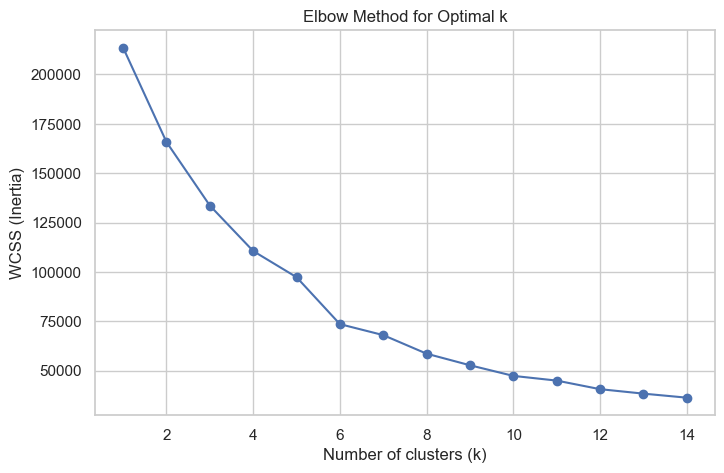

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Calculate WCSS for different k values
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # X_scaled = your standardized feature data
    wcss.append(kmeans.inertia_)  # inertia_ = total WCSS for that k

# 2. Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


Anomaly Counts (KMeans):
is_anomaly_kmeans
0    33812
1     1780
Name: count, dtype: int64


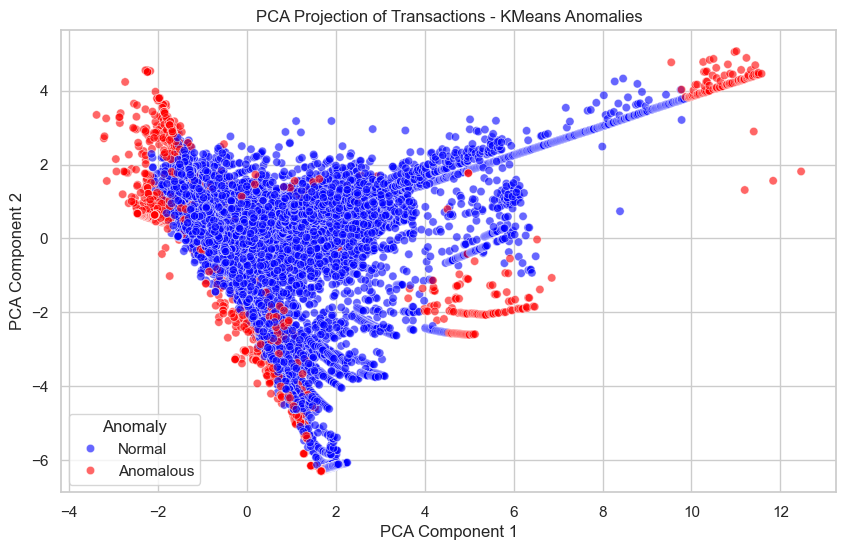

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Features to use
features = [
    'time_diff_sec',
    'sender_txn_count',
    'receiver_txn_count',
    'sender_avg_rating',
    'receiver_avg_rating',
    'unique_receivers'
]

# Re-scale the data
df_model = df[features].replace([np.inf, -np.inf], np.nan).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Choose number of clusters (you can find using elbow method first)
chosen_k = 5  # Example: let's start with 5 clusters

# Train KMeans
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
kmeans.fit(X_scaled)

# Assign to cluster and calculate distance to center
from sklearn.metrics import pairwise_distances_argmin_min

closest, distances = pairwise_distances_argmin_min(X_scaled, kmeans.cluster_centers_)

# Set anomaly threshold (e.g., top 5% farthest)
threshold = np.percentile(distances, 95)

# Label anomalies
df_model['kmeans_score'] = distances
df_model['is_anomaly_kmeans'] = (distances > threshold).astype(int)

# PCA for visualization
pca_kmeans = PCA(n_components=2)
X_pca_kmeans = pca_kmeans.fit_transform(X_scaled)
df_model['pca1_kmeans'] = X_pca_kmeans[:, 0]
df_model['pca2_kmeans'] = X_pca_kmeans[:, 1]

# Save KMeans labeled data
df_model.to_csv("bitcoinotc_with_kmeans.csv", index=False)

# Print anomaly count summary
print("Anomaly Counts (KMeans):")
print(df_model['is_anomaly_kmeans'].value_counts())

# Plot KMeans anomaly PCA
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_model,
    x='pca1_kmeans',
    y='pca2_kmeans',
    hue='is_anomaly_kmeans',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Normal", "Anomalous"], title="Anomaly")
plt.title("PCA Projection of Transactions - KMeans Anomalies")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("pca_anomaly_plot_kmeans.png", dpi=300)
plt.show()


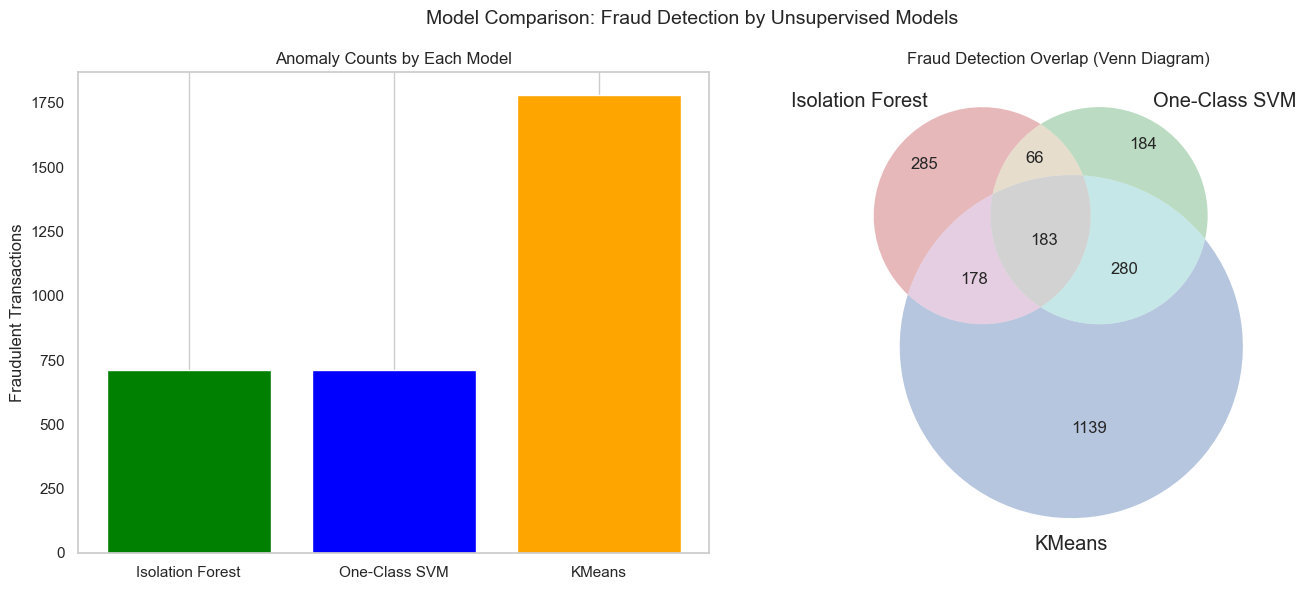

In [45]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# --- Count frauds per model ---
fraud_counts = {
    'Isolation Forest': merged['is_anomaly'].sum(),
    'One-Class SVM': merged['is_anomaly_svm'].sum(),
    'KMeans': merged['is_anomaly_kmeans'].sum()
}

# --- Prepare index sets for Venn ---
set_iforest = set(merged[merged['is_anomaly'] == 1].index)
set_svm = set(merged[merged['is_anomaly_svm'] == 1].index)
set_kmeans = set(merged[merged['is_anomaly_kmeans'] == 1].index)

# --- Create side-by-side figure ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
axs[0].bar(fraud_counts.keys(), fraud_counts.values(), color=['green', 'blue', 'orange'])
axs[0].set_title("Anomaly Counts by Each Model")
axs[0].set_ylabel("Fraudulent Transactions")
axs[0].grid(axis='y')

# Venn diagram
venn3([set_iforest, set_svm, set_kmeans],
      set_labels=('Isolation Forest', 'One-Class SVM', 'KMeans'),
      ax=axs[1])
axs[1].set_title("Fraud Detection Overlap (Venn Diagram)")

plt.suptitle("Model Comparison: Fraud Detection by Unsupervised Models", fontsize=14)
plt.tight_layout()
plt.show()


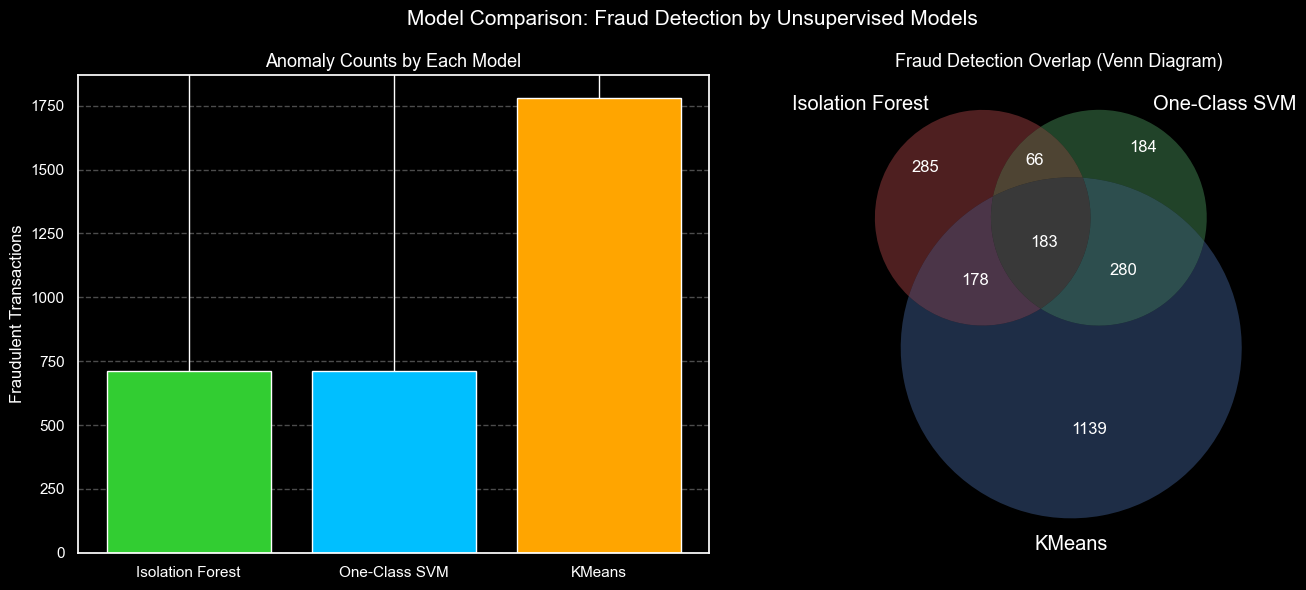

In [53]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# --- Count frauds per model ---
fraud_counts = {
    'Isolation Forest': merged['is_anomaly'].sum(),
    'One-Class SVM': merged['is_anomaly_svm'].sum(),
    'KMeans': merged['is_anomaly_kmeans'].sum()
}

# --- Prepare index sets for Venn ---
set_iforest = set(merged[merged['is_anomaly'] == 1].index)
set_svm = set(merged[merged['is_anomaly_svm'] == 1].index)
set_kmeans = set(merged[merged['is_anomaly_kmeans'] == 1].index)

# --- Apply dark style ---
plt.style.use('dark_background')

# --- Create side-by-side figure ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6), facecolor='black')

# Bar chart
axs[0].bar(fraud_counts.keys(), fraud_counts.values(), color=['limegreen', 'deepskyblue', 'orange'])
axs[0].set_title("Anomaly Counts by Each Model", color='white', fontsize=13)
axs[0].set_ylabel("Fraudulent Transactions", color='white')
axs[0].tick_params(axis='x', colors='white')
axs[0].tick_params(axis='y', colors='white')
axs[0].grid(axis='y', linestyle='--', alpha=0.3)

# Venn diagram
venn = venn3([set_iforest, set_svm, set_kmeans],
             set_labels=('Isolation Forest', 'One-Class SVM', 'KMeans'),
             ax=axs[1])

axs[1].set_title("Fraud Detection Overlap (Venn Diagram)", color='white', fontsize=13)
for text in venn.set_labels:
    if text: text.set_color("white")
for text in venn.subset_labels:
    if text: text.set_color("white")

# Super title
fig.suptitle("Model Comparison: Fraud Detection by Unsupervised Models", fontsize=15, color='white')

plt.tight_layout()
plt.savefig("model_comparison_dark.png", dpi=300, facecolor='black')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load your three labeled outputs
df_iforest = pd.read_csv("bitcoinotc_with_isolationforest.csv")
df_svm = pd.read_csv("bitcoinotc_with_svm.csv")
df_kmeans = pd.read_csv("bitcoinotc_with_kmeans.csv")

# Start from Isolation Forest output (or any one)
merged = df_iforest.copy()

# Add anomaly columns from other models
merged['is_anomaly_svm'] = df_svm['is_anomaly_svm']
merged['is_anomaly_kmeans'] = df_kmeans['is_anomaly_kmeans']

# Final fraud label: 1 if any model flagged as anomaly
merged['is_fraud'] = np.where(
    (merged['is_anomaly'] == 1) | 
    (merged['is_anomaly_svm'] == 1) | 
    (merged['is_anomaly_kmeans'] == 1),
    1, 0
)

# Save final labeled dataset
merged.to_csv("bitcoinotc_supervised_labeled.csv", index=False)

# Print fraud count
print("Final Fraud Label Counts:")
print(merged['is_fraud'].value_counts())


✅ Final Fraud Label Counts:
is_fraud
0    33277
1     2315
Name: count, dtype: int64


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("bitcoinotc_supervised_labeled.csv")

# Features and target
features = [
    'time_diff_sec',
    'sender_txn_count',
    'receiver_txn_count',
    'sender_avg_rating',
    'receiver_avg_rating',
    'unique_receivers'
]
X = df[features]
y = df['is_fraud']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# ----------------------
# Logistic Regression
# ----------------------
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# ----------------------
# Random Forest
# ----------------------
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:\n", classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# ----------------------
# XGBoost
# ----------------------
xgb = XGBClassifier(eval_metric='logloss',
                    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
                    random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost:\n", classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      6656
           1       0.31      0.77      0.44       463

    accuracy                           0.87      7119
   macro avg       0.65      0.83      0.69      7119
weighted avg       0.94      0.87      0.90      7119

[[5869  787]
 [ 107  356]]

Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6656
           1       0.96      0.91      0.93       463

    accuracy                           0.99      7119
   macro avg       0.98      0.95      0.96      7119
weighted avg       0.99      0.99      0.99      7119

[[6640   16]
 [  43  420]]

XGBoost:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      6656
           1       0.88      0.97      0.92       463

    accuracy                           0.99      7119
   macro avg       0.94 

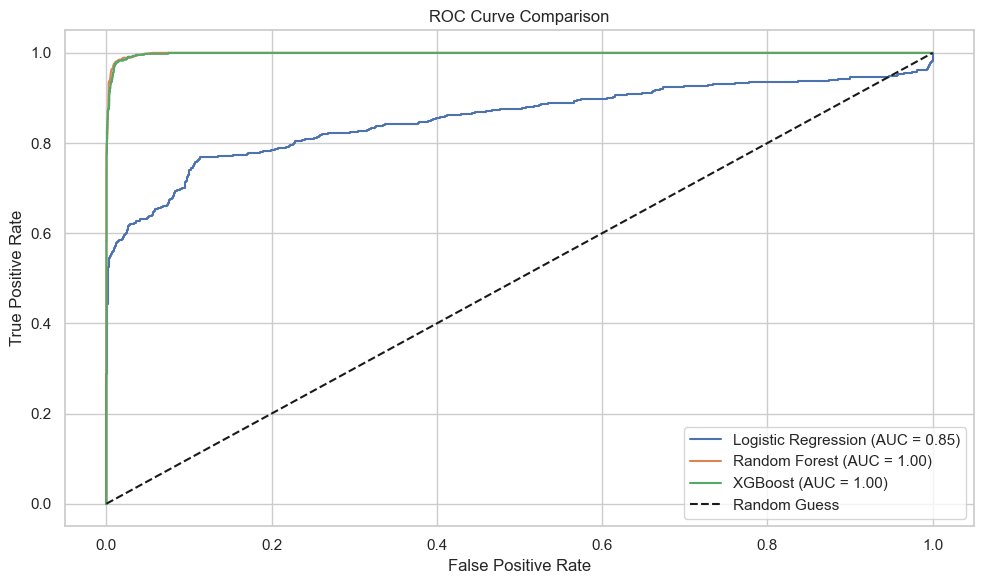

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# AUC Scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



📊 Model Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.874,0.311,0.769,0.443
1,Random Forest,0.992,0.963,0.907,0.934
2,XGBoost,0.989,0.877,0.970,0.921


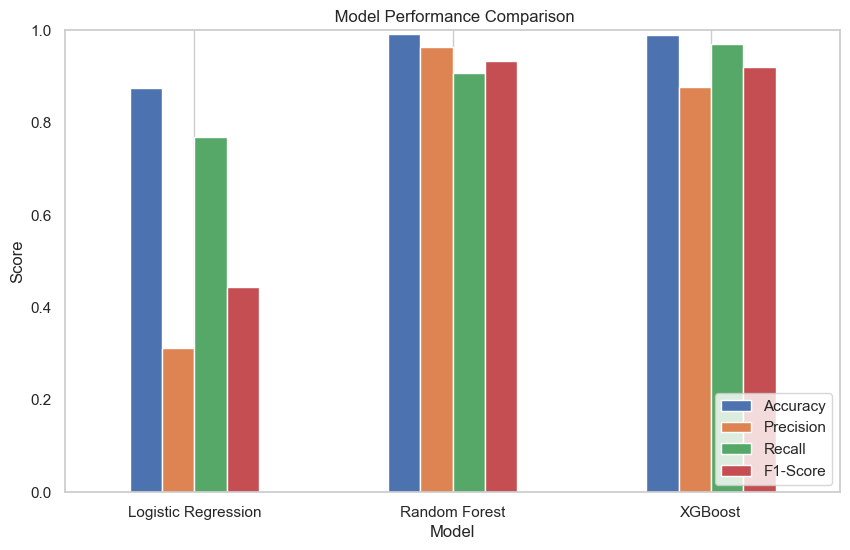

In [51]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Collect model scores
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}

# Create dataframe
import pandas as pd
comparison_df = pd.DataFrame(results)

# Show
print("\n📊 Model Comparison:")
display(comparison_df.round(3))



# Setup
comparison_df.set_index('Model', inplace=True)

# Plot
comparison_df.plot(kind='bar', figsize=(10,6))
plt.title(' Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


C:\Users\Kunal Vishwa\AppData\Local\Temp\ipykernel_18188\765682479.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()], color='white')


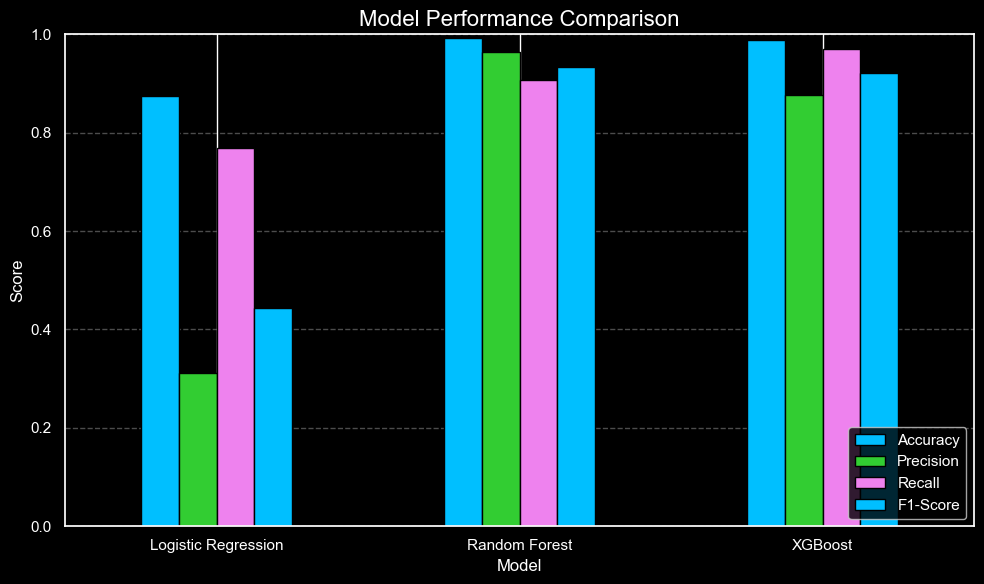

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Collect model scores
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(results)
comparison_df.set_index('Model', inplace=True)

# Set dark style
plt.style.use('dark_background')

# Define consistent dark-mode bar colors (one per model)
bar_colors = ['deepskyblue', 'limegreen', 'violet']

# Plot with custom colors per model
ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=bar_colors, edgecolor='black')

# Customize appearance
ax.set_title('Model Performance Comparison', fontsize=16, color='white')
ax.set_ylabel('Score', color='white')
ax.set_ylim(0, 1)
ax.legend(loc='lower right', facecolor='black', labelcolor='white')
ax.set_xticklabels(comparison_df.index, rotation=0, color='white')
ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()], color='white')
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("model_comparison_dark_vibrant.png", dpi=300, facecolor='black')
plt.show()


C:\Users\Kunal Vishwa\AppData\Local\Temp\ipykernel_18188\4178347065.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()], color='white')


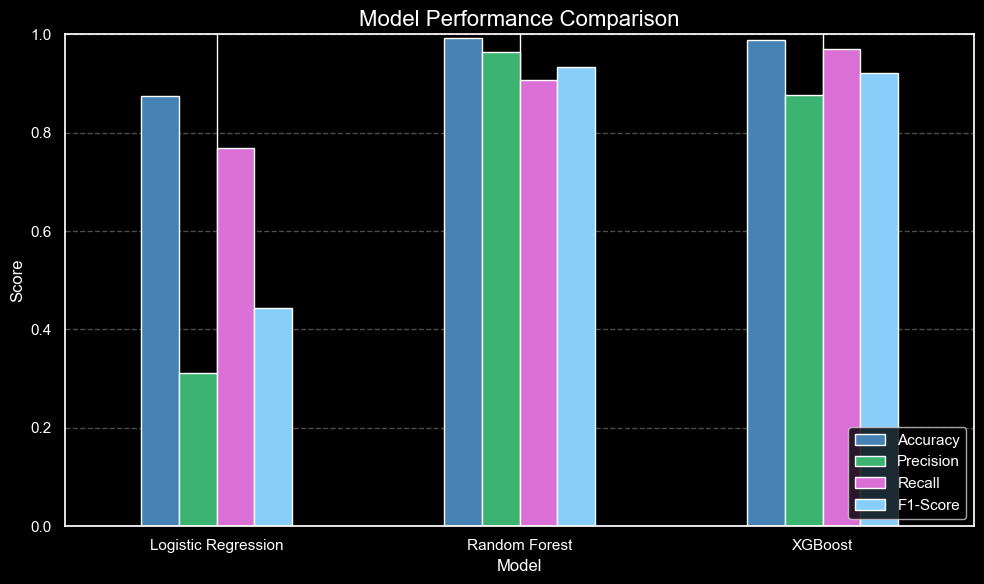

In [57]:
# Create DataFrame again if needed
comparison_df = pd.DataFrame(results)
comparison_df.set_index('Model', inplace=True)

# Set dark style
plt.style.use('dark_background')

# Define new soft but readable colors
metric_colors = {
    'Accuracy': 'steelblue',
    'Precision': 'mediumseagreen',
    'Recall': 'orchid',
    'F1-Score': 'lightskyblue'
}

# Plot
ax = comparison_df.plot(
    kind='bar',
    figsize=(10, 6),
    color=[metric_colors[col] for col in comparison_df.columns]
)

# Customize appearance
ax.set_title('Model Performance Comparison', fontsize=16, color='white')
ax.set_ylabel('Score', color='white')
ax.set_ylim(0, 1)
ax.legend(loc='lower right', facecolor='black', labelcolor='white')
ax.set_xticklabels(comparison_df.index, rotation=0, color='white')
ax.set_yticklabels([f"{tick:.1f}" for tick in ax.get_yticks()], color='white')
ax.tick_params(colors='white')
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("model_comparison_soft_dark.png", dpi=300, facecolor='black')
plt.show()
